In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import spearmanr
from scipy import stats

In [3]:
df = pd.read_csv('p2_mod.csv')

In [4]:
df.shape
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
x = df[["X1",	"X2","X3",	"X4","X5","X18","X19","X20",	"X21","X22",	"X23"]]
y= df[["Y"]]

In [6]:
print(x)
print(y)

           X1  X2  X3  X4  X5    X18    X19    X20   X21    X22   X23
0       20000   2   2   1  24      0    689      0     0      0     0
1      120000   2   2   2  26      0   1000   1000  1000      0  2000
2       90000   2   2   2  34   1518   1500   1000  1000   1000  5000
3       50000   2   2   1  37   2000   2019   1200  1100   1069  1000
4       50000   1   2   1  57   2000  36681  10000  9000    689   679
...       ...  ..  ..  ..  ..    ...    ...    ...   ...    ...   ...
29995  220000   1   3   1  39   8500  20000   5003  3047   5000  1000
29996  150000   1   3   2  43   1837   3526   8998   129      0     0
29997   30000   1   2   2  37      0      0  22000  4200   2000  3100
29998   80000   1   3   1  41  85900   3409   1178  1926  52964  1804
29999   50000   1   2   1  46   2078   1800   1430  1000   1000  1000

[30000 rows x 11 columns]
       Y
0      1
1      1
2      0
3      0
4      0
...   ..
29995  0
29996  0
29997  1
29998  1
29999  1

[30000 rows x 1 columns]

In [7]:
X_new = SelectKBest(chi2, k=1).fit_transform(x, y)

In [8]:
X_new.shape

(30000, 1)

In [9]:
pd.crosstab(np.squeeze(X_new), np.squeeze(y))

Y,0,1
row_0,,
10000,296,197
16000,2,0
20000,1278,698
30000,1042,568
40000,138,92
...,...,...
750000,4,0
760000,1,0
780000,2,0


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

BFE

In [19]:
!pip install mlxtend

In [20]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [21]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d ar

In [22]:
sbs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [23]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [24]:
df

,feature_idx,avg_score
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)",0.778208
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.778208
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.778208
8,"(0, 1, 2, 3, 4, 5, 6, 7)",0.778208
7,"(0, 1, 2, 3, 4, 5, 6)",0.778208
6,"(0, 1, 2, 3, 4, 5)",0.778208
5,"(0, 1, 2, 3, 4)",0.778208
4,"(0, 1, 2, 3)",0.778208
3,"(0, 1, 2)",0.778208
2,"(0, 1)",0.778208


In [25]:
sbs.subsets_

{1: {'avg_score': 0.7782083333333333,
  'cv_scores': array([0.77825 , 0.77825 , 0.778125]),
  'feature_idx': (0,),
  'feature_names': ('0',)},
 2: {'avg_score': 0.7782083333333333,
  'cv_scores': array([0.77825 , 0.77825 , 0.778125]),
  'feature_idx': (0, 1),
  'feature_names': ('0', '1')},
 3: {'avg_score': 0.7782083333333333,
  'cv_scores': array([0.77825 , 0.77825 , 0.778125]),
  'feature_idx': (0, 1, 2),
  'feature_names': ('0', '1', '2')},
 4: {'avg_score': 0.7782083333333333,
  'cv_scores': array([0.77825 , 0.77825 , 0.778125]),
  'feature_idx': (0, 1, 2, 3),
  'feature_names': ('0', '1', '2', '3')},
 5: {'avg_score': 0.7782083333333333,
  'cv_scores': array([0.77825 , 0.77825 , 0.778125]),
  'feature_idx': (0, 1, 2, 3, 4),
  'feature_names': ('0', '1', '2', '3', '4')},
 6: {'avg_score': 0.7782083333333333,
  'cv_scores': array([0.77825 , 0.77825 , 0.778125]),
  'feature_idx': (0, 1, 2, 3, 4, 5),
  'feature_names': ('0', '1', '2', '3', '4', '5')},
 7: {'avg_score': 0.778208333333

Selected Features ID : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)


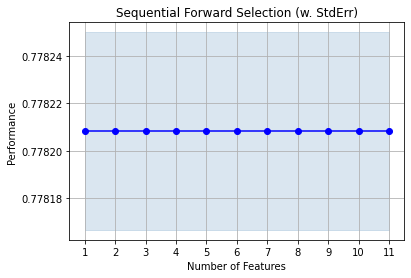

In [26]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
# print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [27]:
newdf = pd.DataFrame(X_train)
print(newdf)

             0         1         2         3         4         5         6   \
0     -0.672359  0.808159  0.184306  0.858114 -1.244658 -0.126892 -0.039537   
1     -1.057768 -1.237381  0.184306  0.858114 -0.811521 -0.038915 -0.194250   
2      0.098459  0.808159  3.971420 -1.054828  0.921024 -0.331937 -0.210475   
3     -0.826523 -1.237381 -1.078065  0.858114 -1.136374 -0.213815 -0.167236   
4     -0.286950  0.808159  0.184306  0.858114 -1.136374 -0.091947 -0.072522   
...         ...       ...       ...       ...       ...       ...       ...   
23995 -0.903605 -1.237381  0.184306  0.858114 -0.378385 -0.214869 -0.121938   
23996  0.252623 -1.237381 -1.078065  0.858114  0.163035  0.458274  0.001602   
23997 -0.903605 -1.237381 -1.078065  0.858114 -1.028090 -0.331937 -0.245478   
23998 -0.749441  0.808159  0.184306  0.858114 -1.136374 -0.156335 -0.163118   
23999 -0.055704  0.808159  0.184306 -1.054828  0.054751 -0.331937 -0.094759   

             7         8         9         10  
0  

In [28]:
selected = list(sbs.k_feature_idx_)

In [29]:
x_bfe = newdf.iloc[:, selected]
print(x_bfe)

             0         1         2         3         4         5         6   \
0     -0.672359  0.808159  0.184306  0.858114 -1.244658 -0.126892 -0.039537   
1     -1.057768 -1.237381  0.184306  0.858114 -0.811521 -0.038915 -0.194250   
2      0.098459  0.808159  3.971420 -1.054828  0.921024 -0.331937 -0.210475   
3     -0.826523 -1.237381 -1.078065  0.858114 -1.136374 -0.213815 -0.167236   
4     -0.286950  0.808159  0.184306  0.858114 -1.136374 -0.091947 -0.072522   
...         ...       ...       ...       ...       ...       ...       ...   
23995 -0.903605 -1.237381  0.184306  0.858114 -0.378385 -0.214869 -0.121938   
23996  0.252623 -1.237381 -1.078065  0.858114  0.163035  0.458274  0.001602   
23997 -0.903605 -1.237381 -1.078065  0.858114 -1.028090 -0.331937 -0.245478   
23998 -0.749441  0.808159  0.184306  0.858114 -1.136374 -0.156335 -0.163118   
23999 -0.055704  0.808159  0.184306 -1.054828  0.054751 -0.331937 -0.094759   

             7         8         9         10  
0  

In [30]:
bfe_X_train, bfe_X_test, bfe_y_train, bfe_y_test = train_test_split(x_bfe, y_train, test_size = 0.2, random_state = 42)

SVM

In [31]:
from sklearn import svm
from sklearn.svm import SVC

In [32]:
svm = svm.SVC()
svm.fit(bfe_X_train, bfe_y_train)
svm.score(bfe_X_train, bfe_y_train)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


77.92708333333334

In [33]:
svm_score = svm.score(bfe_X_test, bfe_y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 77.60416666666666


KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(bfe_X_train, bfe_y_train)
knn.fit(bfe_X_train, bfe_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [35]:
score = knn.score(bfe_X_test, bfe_y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 74.125


DT

In [36]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(bfe_X_train, bfe_y_train)

DecisionTreeClassifier()

In [37]:
j=dclf.score(bfe_X_test, bfe_y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 68.29166666666666


RF

In [38]:
def run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 42, n_jobs = -1)
    clf.fit(bfe_X_train, bfe_y_train)
    y_pred = clf.predict(bfe_X_test)
    score = accuracy_score(bfe_y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [39]:
run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy: 78.0625


LR

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bfe_X_train, bfe_y_train)
lr = model.score(bfe_X_test, bfe_y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 77.60416666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
